In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from WGAIN_model import *
print(tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

2.4.1
Num GPUs Available:  0


In [2]:
batch_size = 10
side = 128

path = "./datasets/celeba/%s128"
celeba_test = data.Dataset.list_files(path%'test' + str('/*.jpg'))
celeba_test_d = prepare_training_dataset(celeba_test, batch_size, side)

# create the model
generator = build_generator(side)
# generator.summary()
critic = build_critic(side)
# critic.summary()

# Load weights
model_path = "saved_models_celeba/"

generator.load_weights(model_path + "gultimate_final")
critic.load_weights(model_path + "cultimate_final")

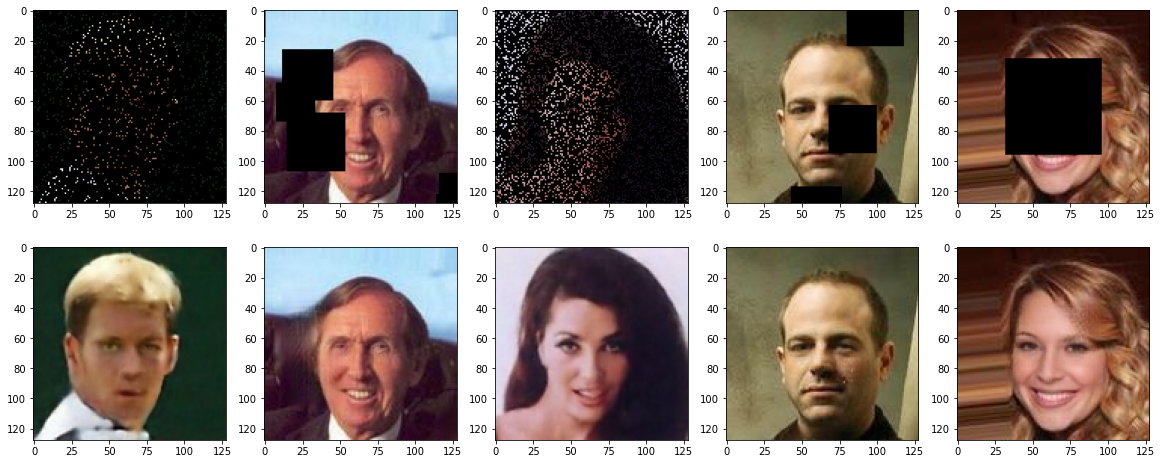

In [4]:
it = iter(celeba_test_d)
origX, newX, mask, randZ = next(it)
g_out = generator([newX, mask, randZ])
plt.figure(figsize=(20,8))
for i in range(min(5, batch_size)):
    plt.subplot(2,5,i+1)
    plt.imshow(newX[i,:,:,:])
    plt.subplot(2,5,i+6)
    plt.imshow(g_out[i,:,:,:])
plt.show()